## Week 6 exercise:


In [1]:
import sys
assert sys.version_info >=(3,7)

import cv2 as cv
import numpy as np
from util_func import *

In [3]:
from matplotlib import pyplot as plt

## Exercise 1

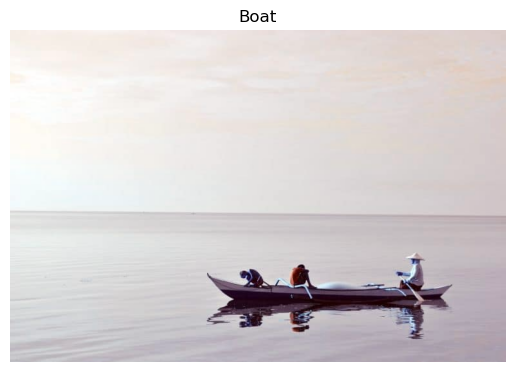

In [4]:
img = cv.imread("images/boat.jpg")

plt.imshow(img)
plt.title("Boat")
plt.axis("off")
plt.show()

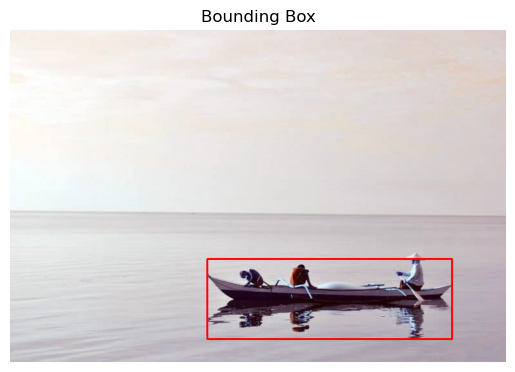

In [5]:
# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

# Apply Otsu Thresholding
thres = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# Find the contours in the thresholded image
contours, _ = cv.findContours(thres, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Find the largest contour
largest = max(contours, key=cv.contourArea)

# Get the bounding box of the largest contour
x,y,w,h = cv.boundingRect(largest)

cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display
plt.imshow(img)
plt.title("Bounding Box")
plt.axis("off")
plt.show()

## Exercise 2

In [6]:
leaf = cv.imread("images/leaf.jfif")

show_img("Leaf", leaf)

In [7]:
gray = cv.cvtColor(leaf, cv.COLOR_RGB2GRAY)

# Apply thresholding to segment the leaf from the background
_, thres = cv.threshold(gray, 128, 255, cv.THRESH_BINARY_INV)

# Create a trackbar function
def trackbar (x):
    if x == 0: # make the minimum value of the trackbar starts from 1
        return
    
    # used in Morphological operations to define the shape and size of the neighbourhood around each pixel
    kernel_size = (x, x)  # Square structuring element with size x
    kernel = cv.getStructuringElement(cv.MORPH_RECT, kernel_size)
    
    erosion = cv.erode(thres, kernel, iterations = 1)
    dilation = cv.dilate(thres, kernel, iterations = 1)
    opening = cv.morphologyEx(thres, cv.MORPH_OPEN, kernel)
    closing = cv.morphologyEx(thres, cv.MORPH_CLOSE, kernel)
    
    result = np.hstack((erosion, dilation, opening, closing))
    cv.imshow("window", result)
    
# Create a window and a trackbar
cv.namedWindow("window")
cv.createTrackbar("kernel size", "window", 1, 20, trackbar)

cv.waitKey(0)
cv.destroyAllWindows()

## Exercise 3

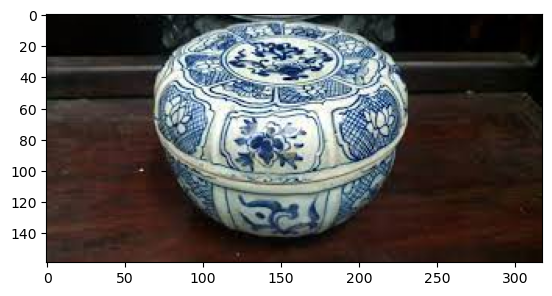

In [16]:
import matplotlib.pyplot as plt
img = cv.imread("images/porcelain1.jfif")
img_conv = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img_conv)

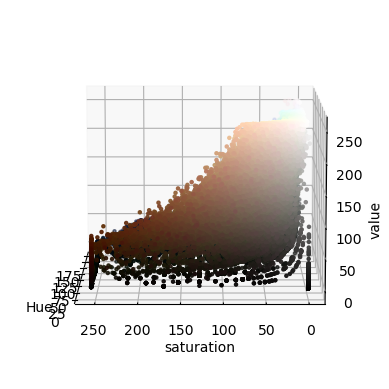

In [18]:
from matplotlib import colors

img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)

h, s, v = cv.split(img_hsv)
#set up 3D figure
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

# pixel colors ready as argument for scatter plot
pixel_colors = img.reshape((-1, 3))
norm = colors.Normalize()
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()

axis.scatter(h.ravel(), s.ravel(), v.ravel(),
            facecolors = pixel_colors, marker=".")
axis.view_init(elev=10, azim=180)
axis.set_xlabel("Hue")
axis.set_ylabel("saturation")
axis.set_zlabel("value")
plt.show()

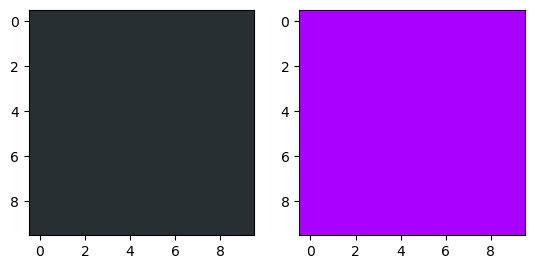

In [20]:

import numpy as np


# Define HSV values for blue color range
blue_low_1 = np.array([100, 50, 50], dtype=np.uint8)
blue_high_1 = np.array([140, 255, 255], dtype=np.uint8)

# Create blue squares using HSV color
square1 = np.full((10, 10, 3), blue_low_1, dtype=np.uint8)
square2 = np.full((10, 10, 3), blue_high_1, dtype=np.uint8)

# Convert and display the squares using matplotlib
plt.subplot(121), plt.imshow(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt.imshow(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()


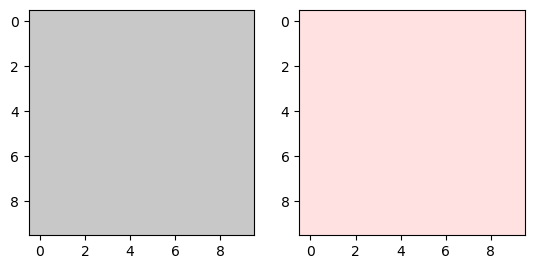

In [22]:
# Define HSV values for white color range
white_low_1 = np.array([0, 0, 200], dtype=np.uint8)
white_high_1 = np.array([180, 30, 255], dtype=np.uint8)

# Create white squares using HSV color
square1 = np.full((10, 10, 3), white_low_1, dtype=np.uint8)
square2 = np.full((10, 10, 3), white_high_1, dtype=np.uint8)

# Convert and display the squares using matplotlib
plt.subplot(121), plt.imshow(cv.cvtColor(square1, cv.COLOR_HSV2RGB))
plt.subplot(122), plt.imshow(cv.cvtColor(square2, cv.COLOR_HSV2RGB))
plt.show()

In [23]:
def color_seg_1(img, color_low, color_high, color_low_1, color_high_1, smooth = True):
    """Args:
    img: source image
    color_low and color_high are tuple of colors
    smooth is boolean (blurring or not)
    """
    
    ori_img = img.copy()
    if smooth:
        #img = cv.GaussianBlur(img, (5, 5), 0)
        
        #change from RGB to HSV
        img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
        
        #mask
        mask_1 = cv.inRange(img_hsv, color_low, color_high)
        #mask_1 = cv.erode(mask_1, None, iterations = 1)
        #mask_1 = cv.dilate(mask_1, None, iterations = 1)
        
        mask_2 = cv.inRange(img_hsv, color_low_1, color_high_1)
        #mask_2 = cv.erode(mask_2, None, iterations = 1)
        #mask_2 = cv.dilate(mask_2, None, iterations = 1)
        
        # Combine the masks using logical OR
        combine = cv.bitwise_or(mask_1, mask_2)
        
        return cv.bitwise_and(ori_img, ori_img, mask = combine)

In [25]:
# img list
imgs_1 = []

for i in range(1, 6):
    img = cv.imread(cv.samples.findFile(f"images/porcelain{i}.jfif"))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs_1.append(img)
    
# Perform color segmentation
# result list
res = [color_seg_1(im, blue_low_1, blue_high_1, white_low_1, white_high_1) for im in imgs_1]

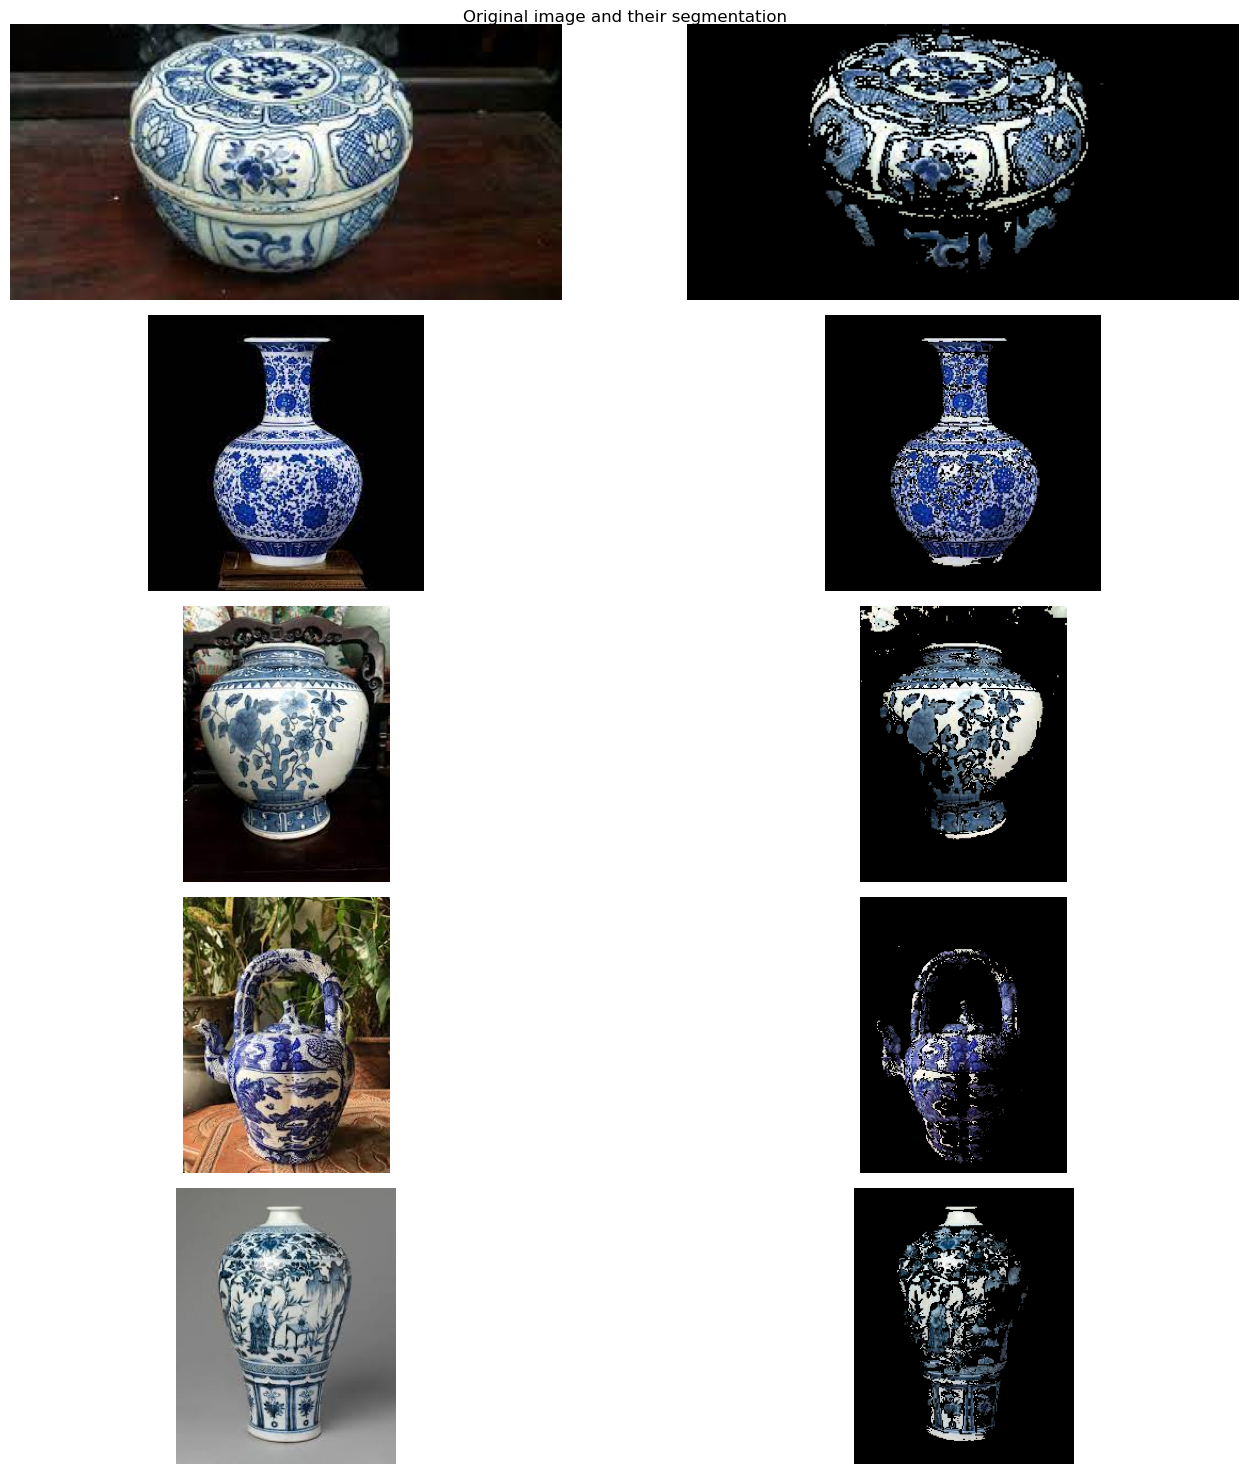

In [26]:
fig, ax = plt.subplots(5, 2, figsize = (15, 15))

for i in range(5):
    ax[i][0].imshow(imgs_1[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res[i])
    ax[i][1].axis("off")
    
fig.suptitle("Original image and their segmentation")
plt.tight_layout()
plt.show()